# Image Processing Programming Assignment 1


### Import dependencies


In [1]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Using the scikit-image library
from skimage import img_as_uint
from skimage.io import imshow, imread
from skimage.color import rgb2gray


## Question 1

Image resizing is a widely used operation in image processing. Either for scaling up or for scaling down, we use interpolation to find the corresponding pixel intensity in the resulting image. Choice of interpolation method is important as it directly affects the quality of the resulting image. The following interpolation methods were mentioned in class:

- Nearest neighbor
- Bilinear
- Bicubic

If you look at PILLOWS reference page you can see that the `resize()` has predefined resampling functions:

- PIL.Image.NEAREST
- PIL.Image.BILINEAR
- PIL.Image.BICUBIC
- PIL.Image.LANCZOS

LANCZOS is a more sophisticated method which gives better results compared to first three methods. If you're interested search the internet for more details on LANCZOS Resampling Method. For this question,you will implement a jupyter notebook script and it will perform these operations:

1. Read colour version of the image `lena.png` and convert colored lena image to greyscale image.
2. Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.NEAREST`
3. Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.BILINEAR`
4. Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.BICUBIC`
5. Your script should display the results as follows using matplotlib along with the PSNR values w.r.t original image below the result image.


### Part 1

Read colour version of the image `lena.png` and convert colored lena image to greyscale image.


Now, reading the `lena.png` image into the notebook.


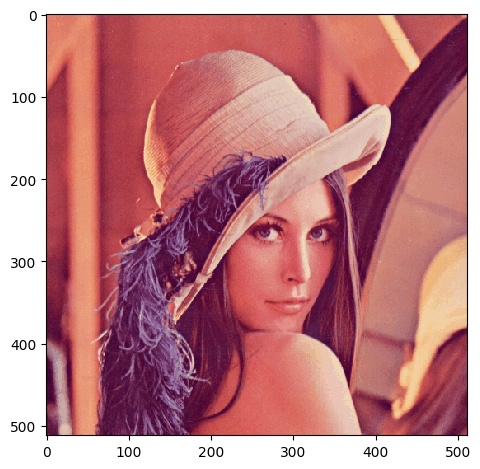

In [2]:
lena = imread("./assets/lena.png")
imshow(lena)


Converting the image to 3 dimensions.


In [3]:
lena.shape


(512, 512, 4)

In [4]:
lena = lena[:, :, :3]


Displaying the greyscale image.


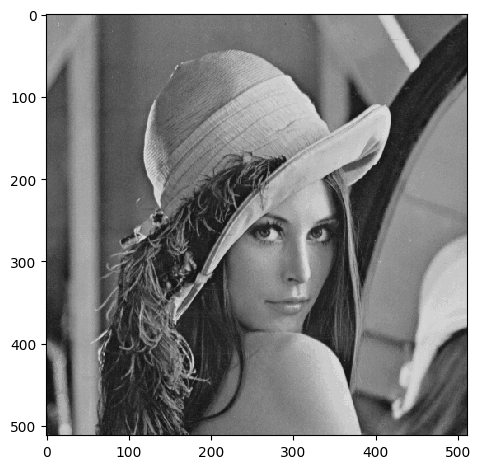

In [5]:
lena_grey = rgb2gray(lena)
imshow(lena_grey)


### Part 2

Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.NEAREST`.


Getting the dimensions of the image read.


In [6]:
lena.size


786432

Resizing the image.


In [7]:
lena_half = lena.resize((256, 256))
plt.imshow(lena_half, cmap="gray")


ValueError: resize only works on single-segment arrays

Resizing it back to the original using `PIL.Image.NEAREST`.


C:\Users\deshi\AppData\Local\Temp\ipykernel_15672\1837770377.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  lena_nearest = lena_half.resize((512, 512), PIL.Image.NEAREST)


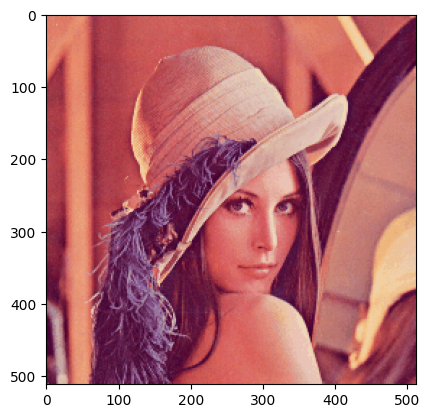

In [ ]:
lena_nearest = lena_half.resize((512, 512), PIL.Image.NEAREST)
plt.imshow(lena_nearest, cmap="gray")


### Part 3

Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.BILINEAR`.


C:\Users\deshi\AppData\Local\Temp\ipykernel_15672\2582413475.py:1: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  lena_bilinear = lena_half.resize((512, 512), PIL.Image.BILINEAR)


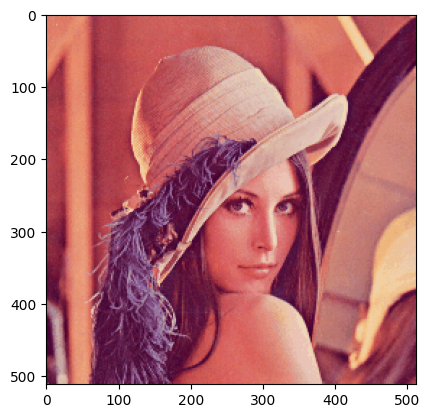

In [ ]:
lena_bilinear = lena_half.resize((512, 512), PIL.Image.BILINEAR)
plt.imshow(lena_bilinear, cmap="gray")


### Part 4

Resize (scale down) the greyscale lena image to half its original size. Then, resize (scale up) it up back to the original size using `resize()` with `PIL.Image.BICUBIC`.


C:\Users\deshi\AppData\Local\Temp\ipykernel_15672\2722628894.py:1: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  lena_bicubic = lena_half.resize((512, 512), PIL.Image.BICUBIC)


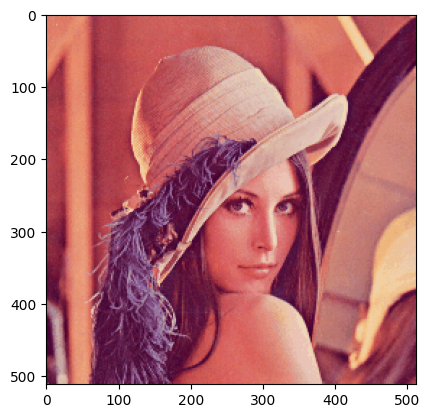

In [ ]:
lena_bicubic = lena_half.resize((512, 512), PIL.Image.BICUBIC)
plt.imshow(lena_bicubic, cmap="gray")


### Part 5

Your script should display the results as follows using matplotlib along with the PSNR values w.r.t original image below the result image.


Function to calculate and return the PSNR value between two images.


In [ ]:
def PSNR(im1, im2):
    R2 = np.amax(im1) ** 2

    MSE = np.sum(np.power(np.subtract(im1, im2), 2))
    MSE /= im1.size[0] * im1.size[1]

    PSNR = 10 * np.log10(R2 / MSE)

    return PSNR


Displaying the results.


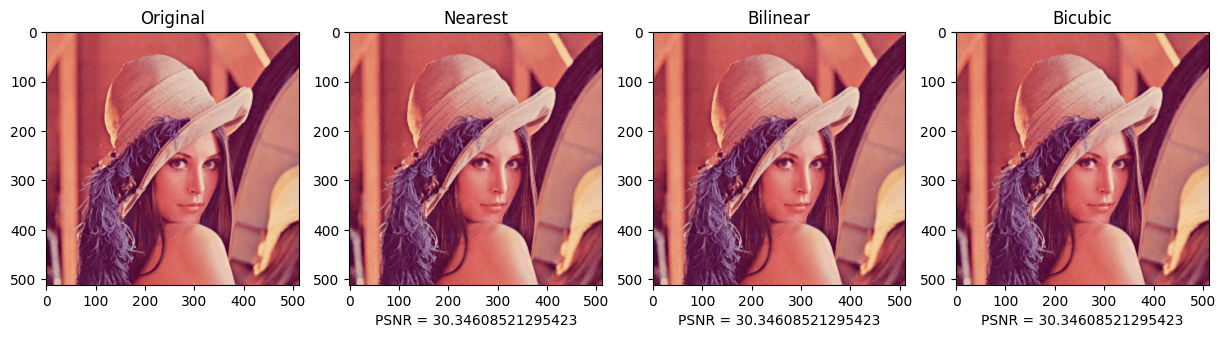

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 10))

ax[0].imshow(lena, cmap="gray")
ax[0].set_title("Original")

ax[1].imshow(lena_nearest, cmap="gray")
ax[1].set_title("Nearest")

ax[1].set_xlabel("PSNR = " + str(PSNR(lena, lena_nearest)))
ax[2].imshow(lena_bilinear, cmap="gray")

ax[2].set_title("Bilinear")
ax[2].set_xlabel("PSNR = " + str(PSNR(lena, lena_bilinear)))
ax[3].imshow(lena_bicubic, cmap="gray")

ax[3].set_title("Bicubic")
ax[3].set_xlabel("PSNR = " + str(PSNR(lena, lena_bicubic)))

plt.show()


---


### Question 2

1. Define a generic function `(ChSwap)` that takes a color image as input and returns the corresponding output image in which the R, G, B channels are swapped as follows:
   1. Splits the input image into R, G, B Channels
   2. Red (Out) = Blue (In)
   3. Green (Out) = Red (In)
   4. Blue (Out) = Green (In)
   5. Combine the new channels to create the new image and return
2. Read color version of the image `lena.png`.
3. Use function `ChSwap` to create a color band swapped version of lena
4. Using matplotlib plot, display the original and new images side-by-side.


Defining a function

In [ ]:
def ch_swap(im):
    im = np.array(im)
    im = im[:, :, ::-1]
    
    return Image.fromarray(im)


In [ ]:
red_eye_kid = Image.open("PA1_Images\kidred.jpg")


FileNotFoundError: [Errno 2] No such file or directory: 'PA1_Images\\kidred.jpg'

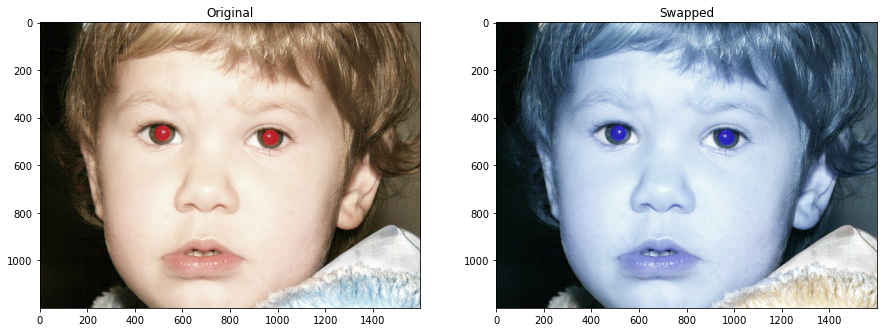

In [ ]:
swap_kid = ch_swap(red_eye_kid)
# show images side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(red_eye_kid)
ax[0].set_title("Original")
ax[1].imshow(swap_kid)
ax[1].set_title("Swapped")
plt.show()


### Question 3


In [ ]:
red_eye_effect = Image.open("PA1_Images/Red-eye_effect.png")
red_eye_image = Image.open("PA1_Images/redeye.jpg")
red_eye_baby = Image.open("PA1_Images/redeyebaby.jpg")


In [ ]:
def plot_all(func):
    fig, ax = plt.subplots(2, 4, figsize=(15, 10))
    ax[0, 0].imshow(red_eye_effect)
    ax[0, 1].imshow(red_eye_image)
    ax[0, 2].imshow(red_eye_baby)
    ax[0, 3].imshow(red_eye_kid)
    ax[1, 0].imshow(func(red_eye_effect))
    ax[1, 1].imshow(func(red_eye_image))
    ax[1, 2].imshow(func(red_eye_baby))
    ax[1, 3].imshow(func(red_eye_kid))
    plt.show()


In [ ]:
def red_eye_removal(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[im > 200] = 255
    im[im <= 200] = 0
    im = im.astype(np.uint8)
    return Image.fromarray(im)


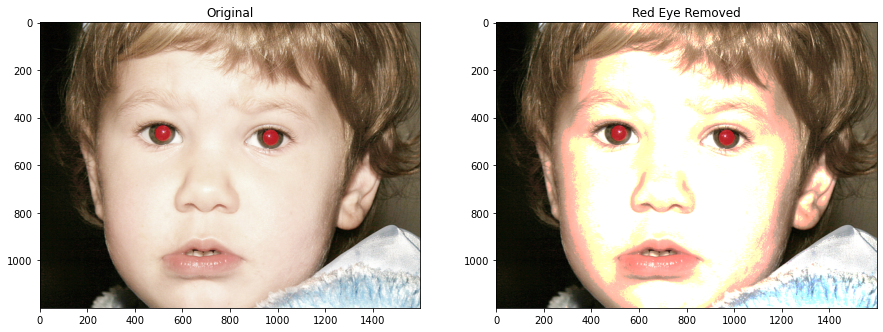

In [ ]:
remove_kid = red_eye_removal(red_eye_kid)
# show images side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(red_eye_kid)
ax[0].set_title("Original")
ax[1].imshow(remove_kid)
ax[1].set_title("Red Eye Removed")
plt.show()


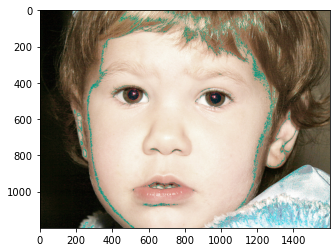

In [ ]:
def red_eye_removal2(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[:, :, 0][(im[:, :, 0] > 180) & (im[:, :, 0] <= 190)] = 0
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plt.imshow(red_eye_removal2(red_eye_kid))


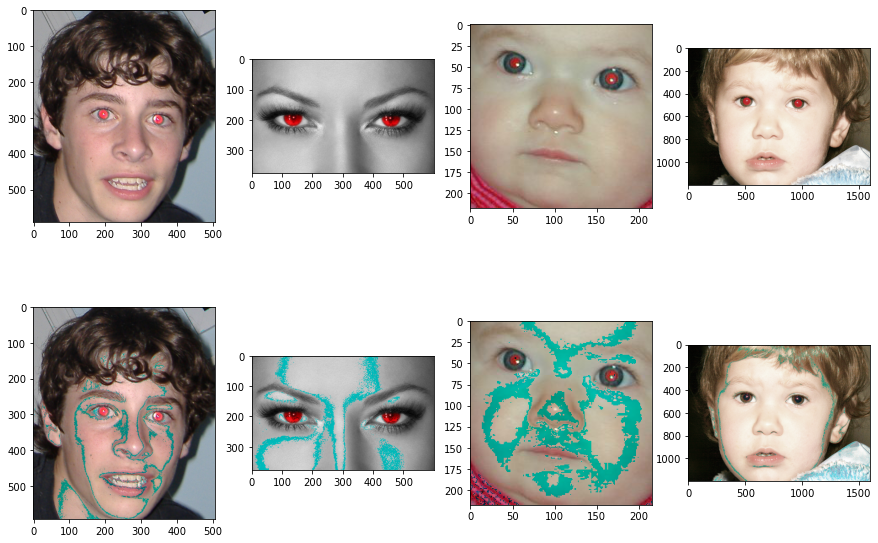

In [ ]:
plot_all(red_eye_removal2)


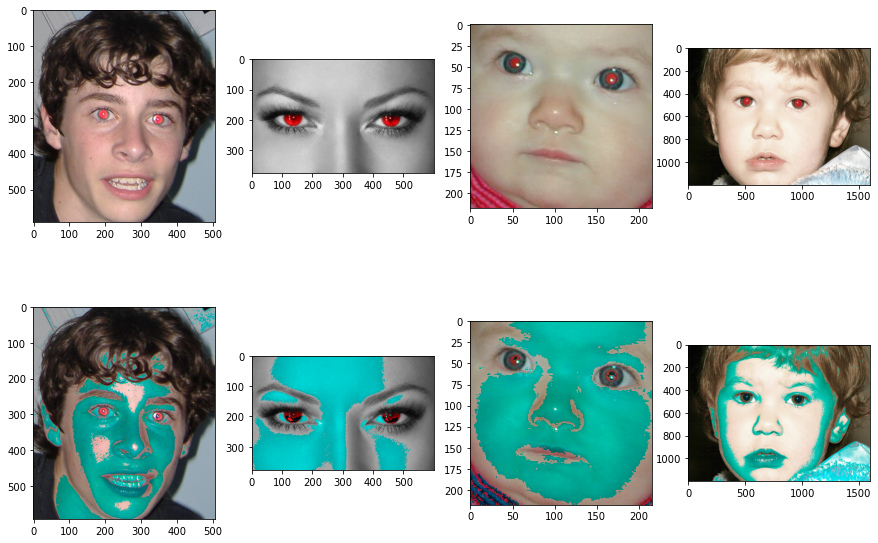

In [ ]:
def red_eye_removal3(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[:, :, 0][(im[:, :, 0] > 170) & (im[:, :, 0] <= 230)] = 00
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plot_all(red_eye_removal3)


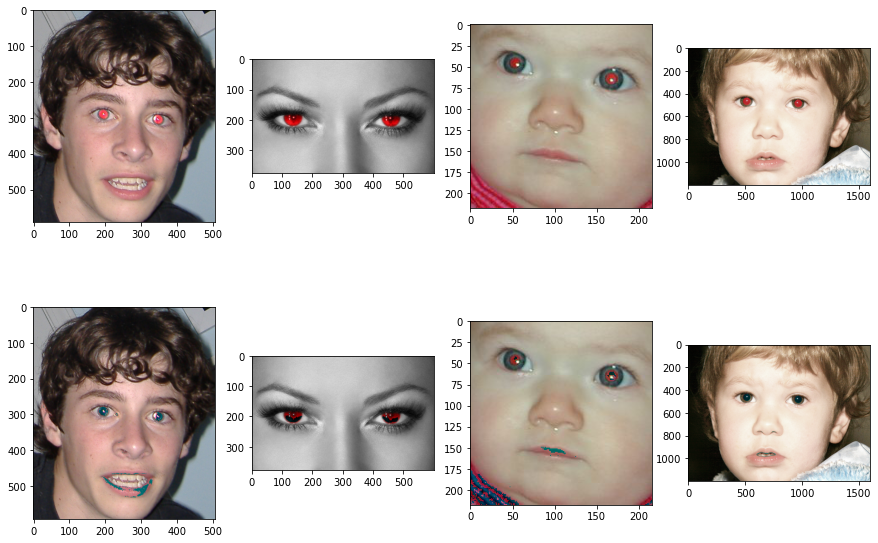

In [ ]:
def red_eye_removal4(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[:, :, 0][(im[:, :, 0] > 170) & (im[:, :, 2] <= 120)
                & (im[:, :, 1] <= 120)] = 0
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plot_all(red_eye_removal4)


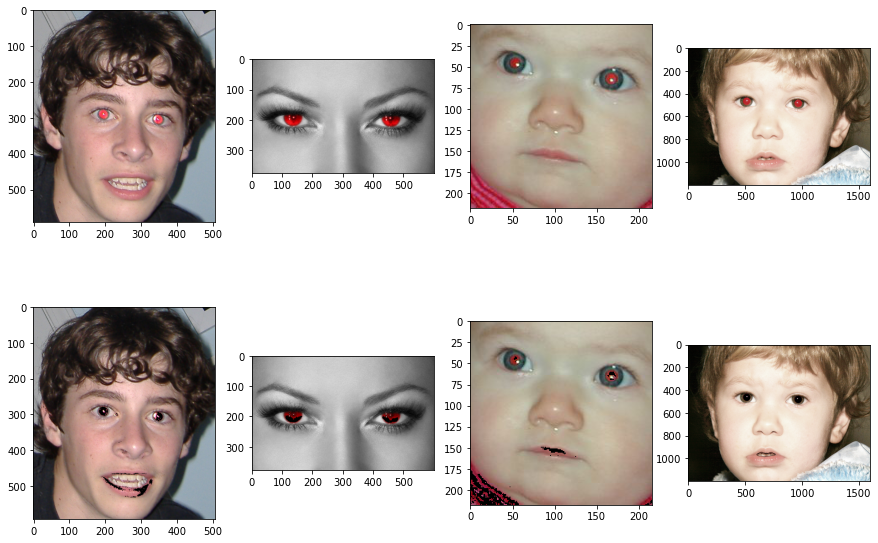

In [ ]:
def red_eye_removal5(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[(im[:, :, 0] > 170) & (im[:, :, 2] <= 120) & (im[:, :, 1] <= 120)] = 0
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plot_all(red_eye_removal5)


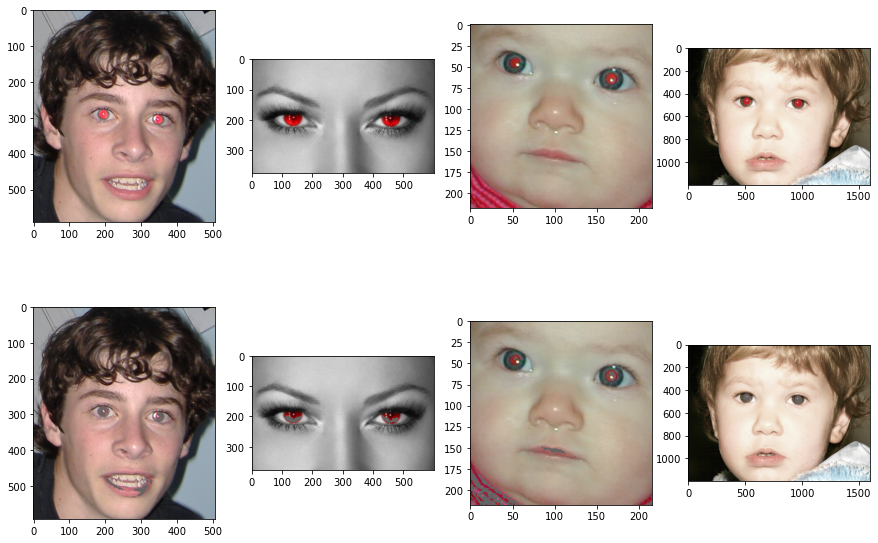

In [ ]:
def red_eye_removal_final(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[(im[:, :, 0] > 170) & (im[:, :, 2] <= 120) & (im[:, :, 1] <= 120)] = 100
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plot_all(red_eye_removal_final)
